In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/DataAnalysisWithPython-7of12/Module5-ModelEvaluation&Refinement/laptops.csv")

In [4]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [5]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','Price-binned'],inplace=True)

In [6]:
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=names)

In [7]:
y = df['Price']
X = df.drop(columns=['Manufacturer','Price','Price-binned'])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
mlr = LinearRegression()

In [10]:
mlr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
mlr.score(X_test,y_test)

0.22125598209547925

In [12]:
XValScore = cross_val_score(mlr,X_train,y_train, cv=4)

In [14]:
XValScor

array([0.4611449 , 0.43343184, 0.47378487, 0.48113004])

In [15]:
XValScore.std()

0.018173856233027752

In [16]:
yhat_xval_train = cross_val_predict(mlr, X_train,y_train,cv=4)
yhat_xval_test = cross_val_predict(mlr, X_test, y_test,cv=4)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_82374/748141875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train,hist=False,color='r',label="Actual Train Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_82374/748141875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

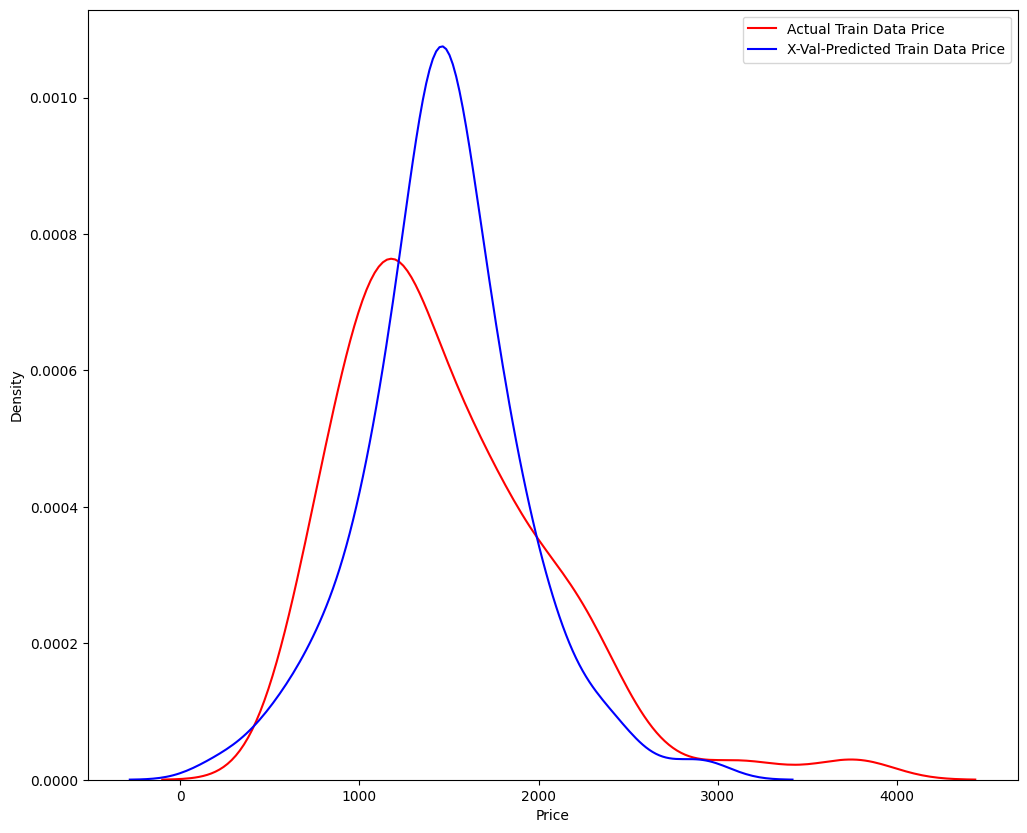

In [20]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_train,hist=False,color='r',label="Actual Train Data Price")
sns.distplot(yhat_xval_train,hist=False,color='b',label="X-Val-Predicted Train Data Price")
plt.legend(

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83795/3086177215.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="Actual Test Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83795/3086177215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

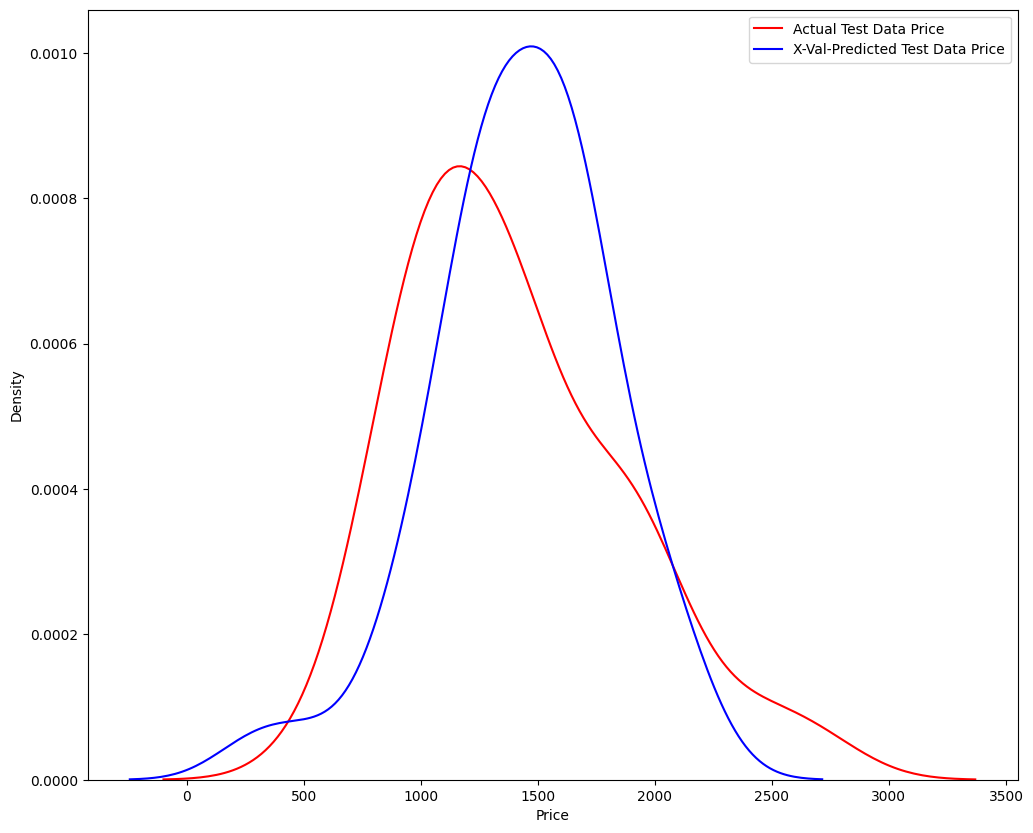

In [17]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_test,hist=False,color='r',label="Actual Test Data Price")
sns.distplot(yhat_xval_test,hist=False,color='b',label="X-Val-Predicted Test Data Price")
plt.legend()

In [18]:
yhat_train = mlr.predict(X_train)
yhat_test = mlr.predict(X_test)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83795/1884269354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='r',label="Actual Train Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83795/1884269354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

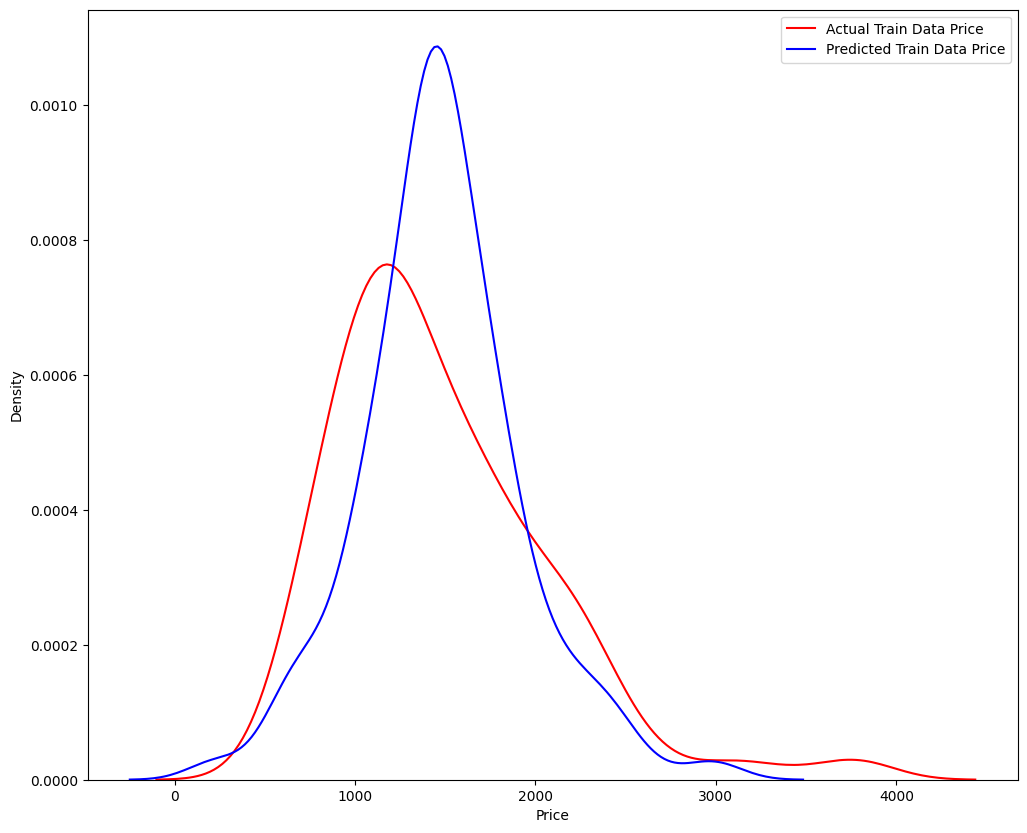

In [19]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_train, hist=False, color='r',label="Actual Train Data Price")
sns.distplot(yhat_train,hist=False,color='b',label="Predicted Train Data Price")
plt.legend()

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_82336/904604006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r',label="Actual Test Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_82336/904604006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

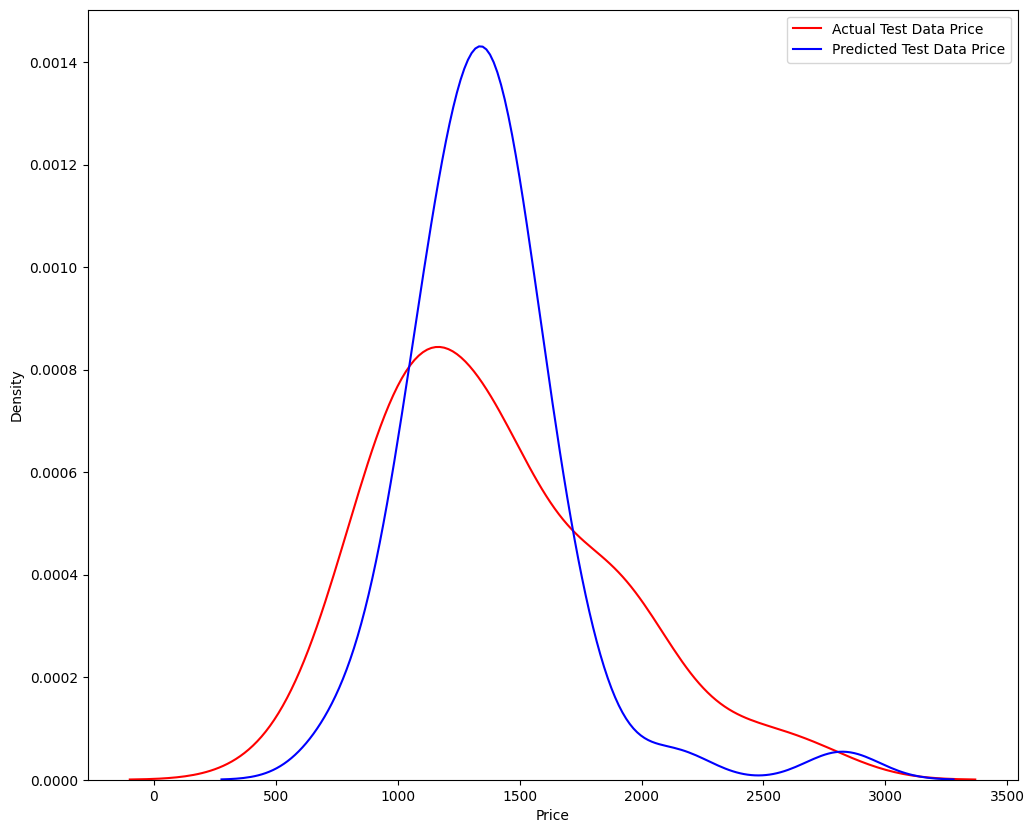

In [20]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_test, hist=False, color='r',label="Actual Test Data Price")
sns.distplot(yhat_test,hist=False,color='b',label="Predicted Test Data Price")
plt.legend()

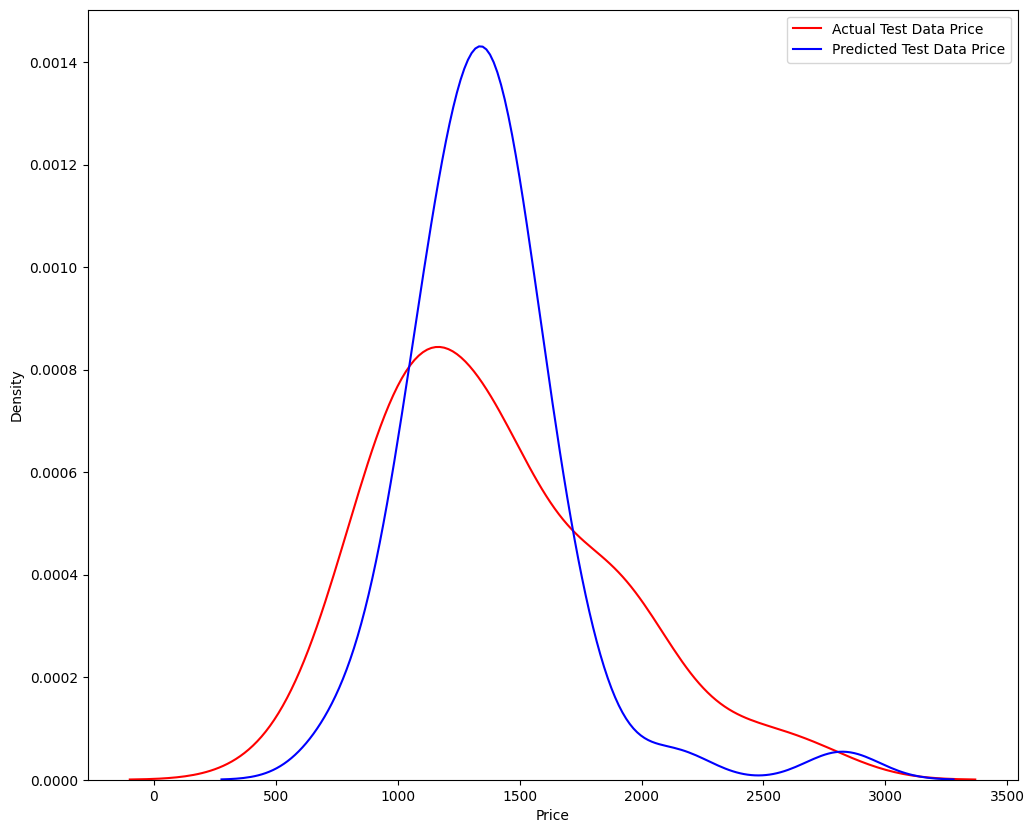

In [20]:
plt.figure(figsize=[12,10])
ax1 = sns.kdeplot(y_test,  color='r',label="Actual Test Data Price")
ax2 = sns.kdeplot(yhat_test,color='b',label="Predicted Test Data Price",ax=ax1)
plt.legend()

In [22]:
X1_train = X_train[['CPU_core']]
X1_test = X_test[['CPU_core']]

In [23]:
pr = PolynomialFeatures(degree=5)

X1_train_pr = pr.fit_transform(X1_train)
X1_test_pr = pr.fit_transform(X1_test)
pr

,degree,5
,interaction_only,False
,include_bias,True
,order,'C'


In [24]:
poly = LinearRegression()
poly.fit(X1_train_pr, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
yhat = poly.predict(X1_test_pr)
yhat[0:5]

array([1778.75      , 1346.58064516, 1346.58064516, 1778.75      ,
       1346.58064516])

In [26]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [1778.75       1346.58064516 1346.58064516 1778.75      ]
True values: [ 939 1142 1453 1142]


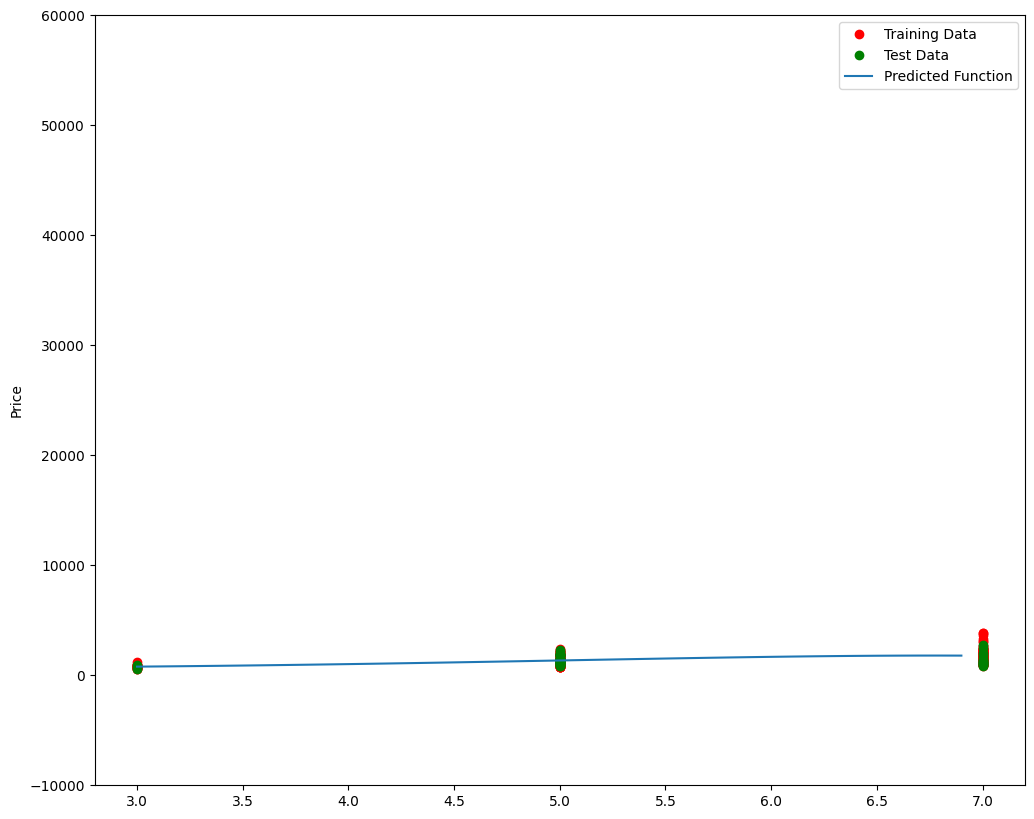

In [27]:
PollyPlot(X1_train, X1_test, y_train, y_test, poly,pr)

In [28]:
poly.score(X1_train_pr,y_train)

0.25212576646850826

In [29]:
poly.score(X1_test_pr, y_test)

-0.04483918225097083

Text(0.5, 1.0, 'R^2 Using Test Data')

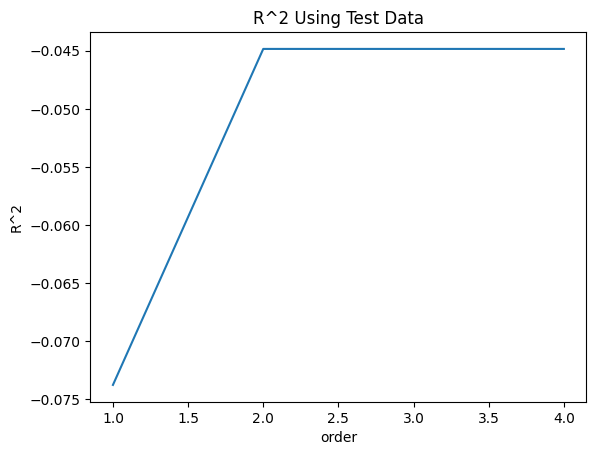

In [31]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X1_train_pr = pr.fit_transform(X1_train)
    
    X1_test_pr = pr.fit_transform(X1_test)    
    
    poly.fit(X1_train_pr, y_train)
    
    Rsqu_test.append(poly.score(X1_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ') 